# WideBot-AI-assignment-Task2-EDA

## Load the Data

In [1]:
import pandas as pd
import numpy as np
from glob import glob
import seaborn as sns
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display
import collections
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

In [2]:
list_of_files=glob('archive/stories*.csv')

In [3]:
list_of_files

['archive\\stories_art-et-culture.csv',
 'archive\\stories_economie.csv',
 'archive\\stories_faits-divers.csv',
 'archive\\stories_marocains-du-monde.csv',
 'archive\\stories_medias.csv',
 'archive\\stories_orbites.csv',
 'archive\\stories_politique.csv',
 'archive\\stories_regions.csv',
 'archive\\stories_societe.csv',
 'archive\\stories_sport.csv',
 'archive\\stories_tamazight.csv']

In [4]:
DataFrame=pd.DataFrame()
for file_path in list_of_files:
    DataFrame=pd.concat([DataFrame,pd.read_csv(file_path)])

In [5]:
DataFrame.sample(3)

,Unnamed: 0,id,title,date,author,story,topic
753,753,eaa6382804fb11eb90f4646e69d991ea,شكاية عبر الهاتف تُطيح بشبكة للدعارة في خريبكة,الخميس 02 يوليوز 2020 - 21:43,هسبريس من خريبكة,أوقفت عناصر الشرطة القضائية بخريبكة، بتعليمات ...,faits-divers
180,180,fcadb99804ee11eb9db1646e69d991ea,وزير الصحة: تعليمات ملكية لإعادة العالقين .. 3...,الخميس 28 ماي 2020 - 18:40,هسبريس - عبد الرحيم العسري,كشف خالد آيت الطالب، وزير الصحة، أن الملك محمد...,marocains-du-monde
781,781,85affc46055711eb9434646e69d991ea,"""الإيركام"" يقيّم تدريس الأمازيغية بالشاوية",الجمعة 13 مارس 2015 - 03:40,عبدالرحيم حمدون,أشاد أحمد بوكوس عميد المعهد الملكي للثقافة الأ...,tamazight


In [6]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 687.5+ KB


## number of examples per class

In [7]:
topics=DataFrame['topic'].unique()
count_per_topic=DataFrame.groupby('topic').count()['story'].values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'art-et-culture'),
  Text(0, 1, 'economie'),
  Text(0, 2, 'faits-divers'),
  Text(0, 3, 'marocains-du-monde'),
  Text(0, 4, 'medias'),
  Text(0, 5, 'orbites'),
  Text(0, 6, 'politique'),
  Text(0, 7, 'regions'),
  Text(0, 8, 'societe'),
  Text(0, 9, 'sport'),
  Text(0, 10, 'tamazight')])

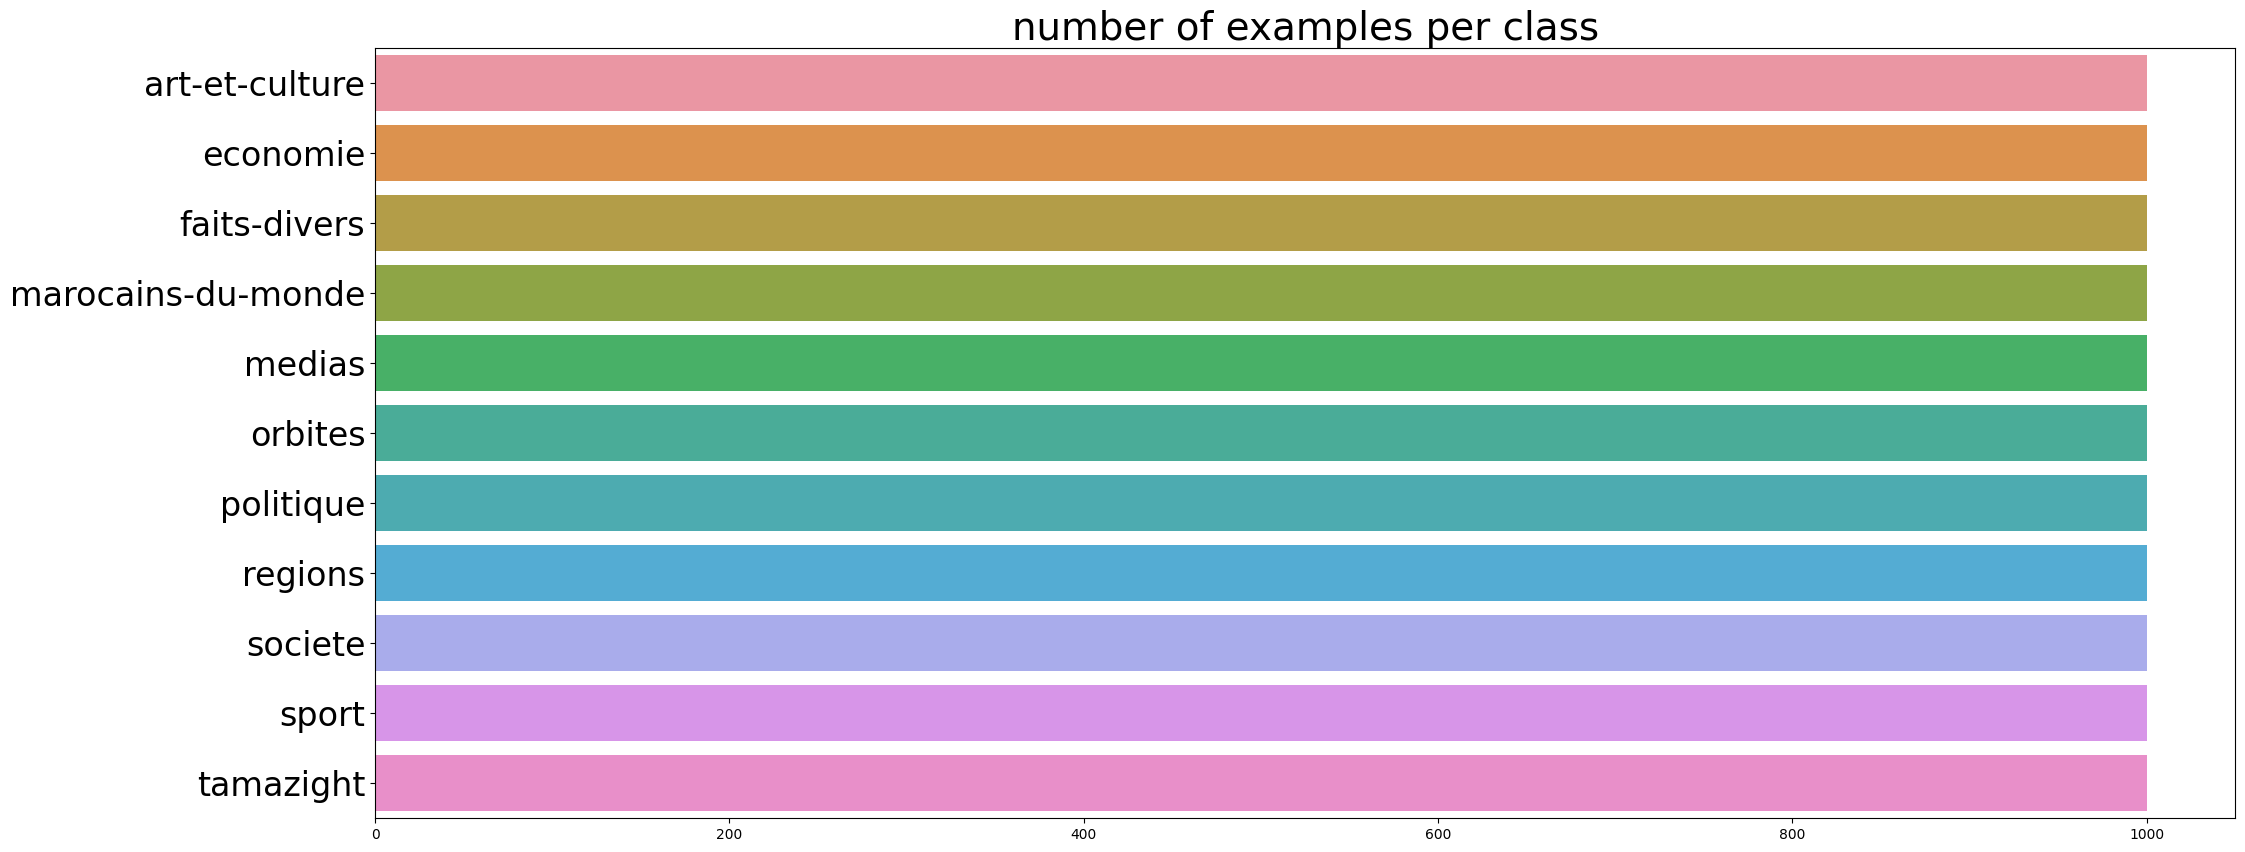

In [32]:
plt.figure(figsize=(24,10))
sns.barplot(x=count_per_topic,y=topics)
plt.title("number of examples per class",fontsize=28)
plt.yticks(fontsize=24)


## Top frequent n-grams generally and per class

In [9]:
stop_words_file = open('list.txt', 'r', encoding='utf-8') 
stop_words = stop_words_file.read().splitlines()+["المغاربة","المغرب","المغربية","المغربي",'أنّ','وذلك']

In [10]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n),stop_words=stop_words).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:15]

### top frequet n-grams generally 

c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'ﺎﻧﻭﺭﻮﻛ'),
  Text(0, 1, 'ﺔﻴﻐﻳﺯﺎﻣﻷﺍ'),
  Text(0, 2, 'ﺔﻟﺎﺣ'),
  Text(0, 3, 'ﺔﻣﻮﻜﺤﻟﺍ'),
  Text(0, 4, 'ﺪﻤﺤﻣ'),
  Text(0, 5, 'ﺔﻴﻨﻃﻮﻟﺍ'),
  Text(0, 6, 'ﻲﻨﻃﻮﻟﺍ'),
  Text(0, 7, 'ﻡﺎﻌﻟﺍ'),
  Text(0, 8, 'ﺲﻴﺋﺭ'),
  Text(0, 9, 'ﺮﺒﻋ'),
  Text(0, 10, 'ﺪﺒﻋ'),
  Text(0, 11, 'ﺔﻣﺎﻌﻟﺍ'),
  Text(0, 12, 'ﻪﺗﺍﺫ'),
  Text(0, 13, 'ﻢﻟﺎﻌﻟﺍ'),
  Text(0, 14, 'ﺔﻴﺤﺼﻟﺍ')])

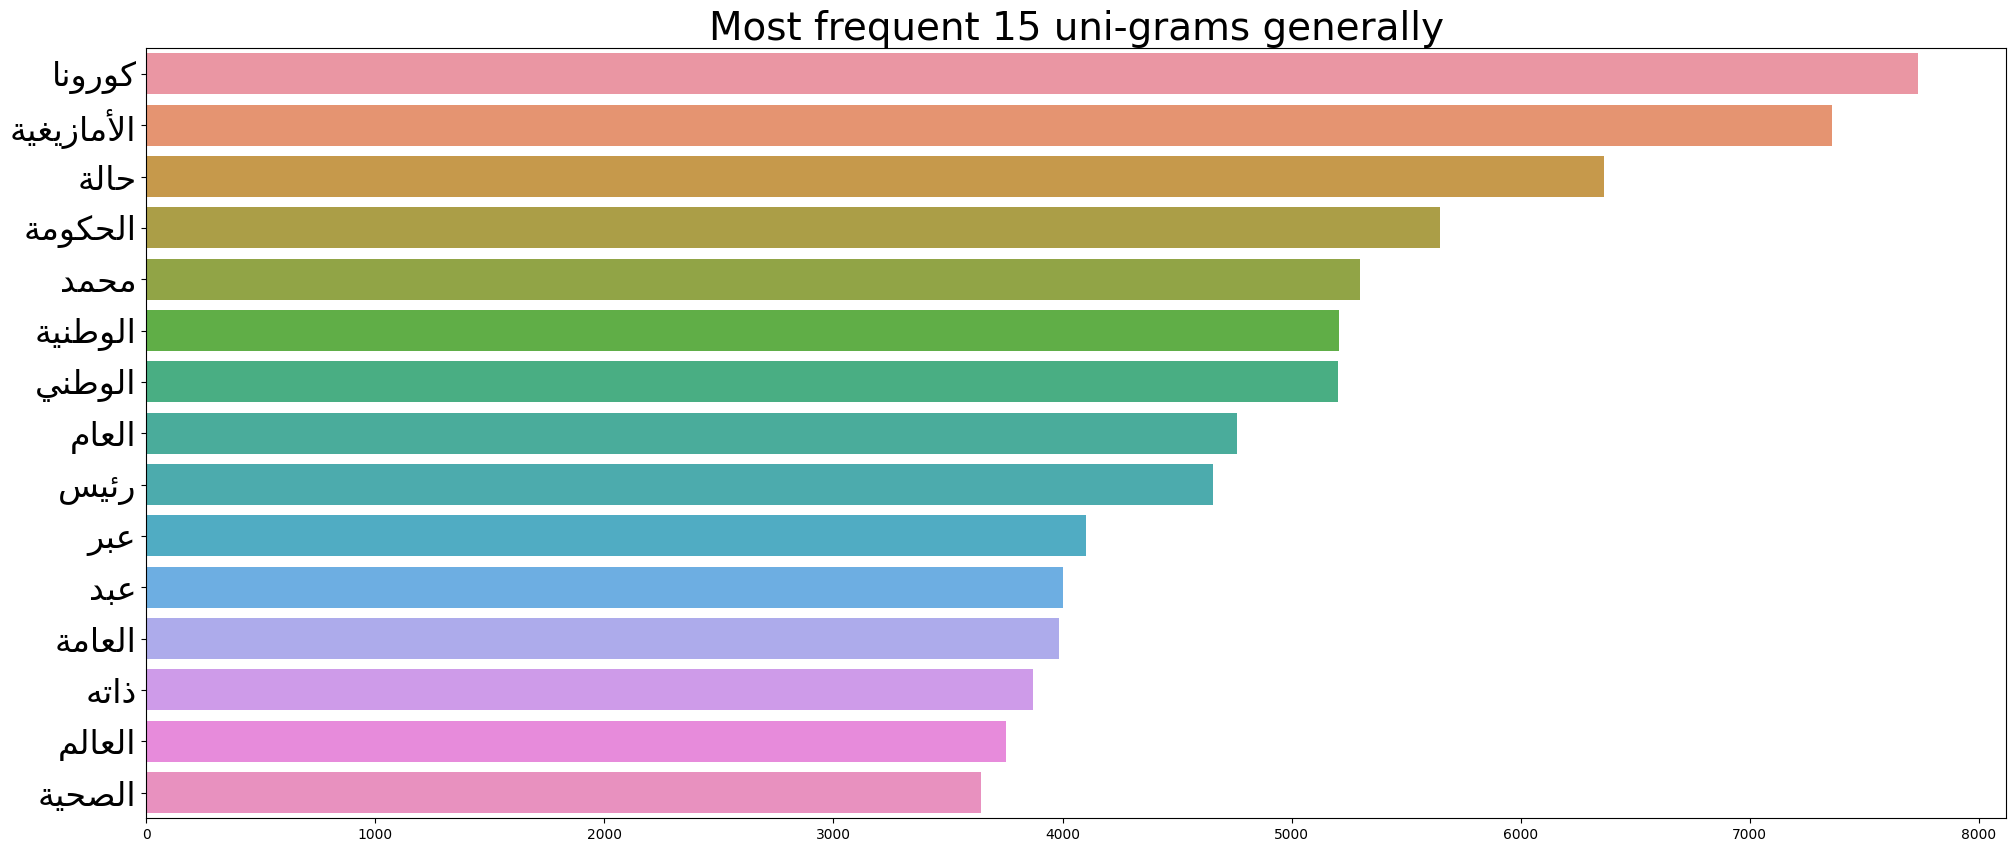

In [31]:
top_uni_grams=get_top_ngram(DataFrame['story'],n=1)
x,y=map(list,zip(*top_uni_grams))
arabic_uni_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]
plt.figure(figsize=(24,10))
sns.barplot(x=y,y=arabic_uni_grams)
plt.title("Most frequent 15 uni-grams generally",fontsize=28)
plt.yticks(fontsize=24)


c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'ﺎﻧﻭﺭﻮﻛ ﺱﻭﺮﻴﻓ'),
  Text(0, 1, '19 ﺪﻴﻓﻮﻛ'),
  Text(0, 2, 'ﺪﺠﺘﺴﻤﻟﺍ ﺎﻧﻭﺭﻮﻛ'),
  Text(0, 3, 'ﺱﺩﺎﺴﻟﺍ ﺪﻤﺤﻣ'),
  Text(0, 4, 'ﻲﺤﺼﻟﺍ ﺮﺠﺤﻟﺍ'),
  Text(0, 5, 'ﺀﺎﻀﻴﺒﻟﺍ ﺭﺍﺪﻟﺍ'),
  Text(0, 6, 'ﺔﻣﺎﻌﻟﺍ ﺔﺑﺎﻴﻨﻟﺍ'),
  Text(0, 7, 'ﺎﻧﻭﺭﻮﻛ ﺔﺤﺋﺎﺟ'),
  Text(0, 8, 'ﺔﻣﻮﻜﺤﻟﺍ ﺲﻴﺋﺭ'),
  Text(0, 9, 'ﺎﻧﻭﺭﻮﻛ ﺱﻭﺮﻴﻔﺑ'),
  Text(0, 10, 'ﺔﻴﻧﻭﺮﺘﻜﻟﻹﺍ ﺲﻳﺮﺒﺴﻫ'),
  Text(0, 11, 'ﺪﻤﺤﻣ ﻚﻠﻤﻟﺍ'),
  Text(0, 12, 'ﻡﺪﻘﻟﺍ ﺓﺮﻜﻟ'),
  Text(0, 13, 'ﻪﺗﺍﺫ ﺭﺪﺼﻤﻟﺍ'),
  Text(0, 14, 'ﻲﻋﺎﻤﺘﺟﻻﺍ ﻞﺻﺍﻮﺘﻟﺍ')])

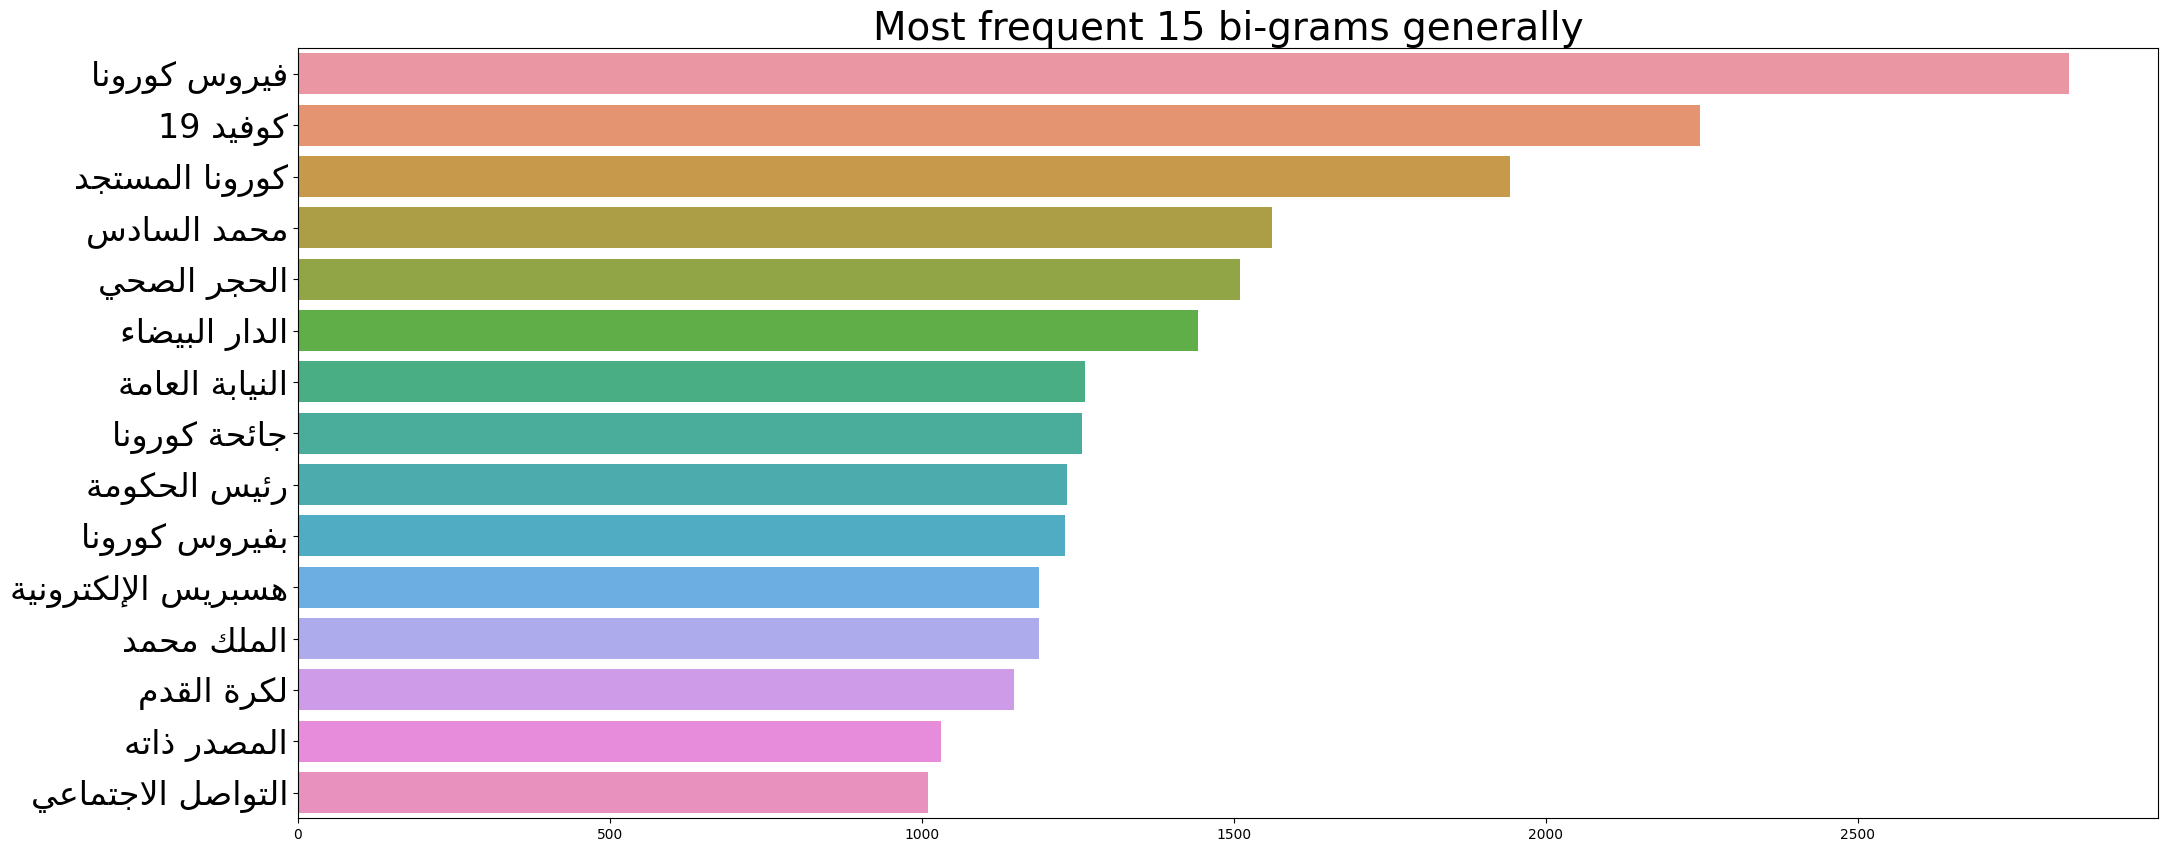

In [33]:
top_bi_grams=get_top_ngram(DataFrame['story'],n=2)
x,y=map(list,zip(*top_bi_grams))
arabic_bi_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]
plt.figure(figsize=(24,10))
sns.barplot(x=y,y=arabic_bi_grams)
plt.title("Most frequent 15 bi-grams generally",fontsize=28)
plt.yticks(fontsize=24)


c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'ﺱﺩﺎﺴﻟﺍ ﺪﻤﺤﻣ ﻚﻠﻤﻟﺍ'),
  Text(0, 1, 'ﺪﺠﺘﺴﻤﻟﺍ ﺎﻧﻭﺭﻮﻛ ﺱﻭﺮﻴﻓ'),
  Text(0, 2, 'ﺔﻴﻧﻭﺮﺘﻜﻟﻹﺍ ﺲﻳﺮﺒﺴﻫ ﺓﺪﻳﺮﺠﻟ'),
  Text(0, 3, 'ﺲﻳﺮﺒﺴﻫ ﺓﺪﻳﺮﺠﻟ ﺢﻳﺮﺼﺗ'),
  Text(0, 4, 'ﺪﺠﺘﺴﻤﻟﺍ ﺎﻧﻭﺭﻮﻛ ﺱﻭﺮﻴﻔﺑ'),
  Text(0, 5, 'ﺔﺼﺘﺨﻤﻟﺍ ﺔﻣﺎﻌﻟﺍ ﺔﺑﺎﻴﻨﻟﺍ'),
  Text(0, 6, 'ﺔﻴﺤﺼﻟﺍ ﺉﺭﺍﻮﻄﻟﺍ ﺔﻟﺎﺣ'),
  Text(0, 7, 'ﻲﻧﺎﻤﺜﻌﻟﺍ ﻦﻳﺪﻟﺍ ﺪﻌﺳ'),
  Text(0, 8, 'ﺔﻴﻐﻳﺯﺎﻣﻷﺍ ﺔﻓﺎﻘﺜﻠﻟ ﻲﻜﻠﻤﻟﺍ'),
  Text(0, 9, 'ﺔﻴﻤﻨﺘﻟﺍﻭ ﺔﻟﺍﺪﻌﻟﺍ ﺏﺰﺣ'),
  Text(0, 10, 'ﺔﻴﻐﻳﺯﺎﻣﻸﻟ ﻲﻤﺳﺮﻟﺍ ﻊﺑﺎﻄﻟﺍ'),
  Text(0, 11, 'ﺔﻓﺎﻘﺜﻠﻟ ﻲﻜﻠﻤﻟﺍ ﺪﻬﻌﻤﻟﺍ'),
  Text(0, 12, 'ﺔﻴﻨﻃﻮﻟﺍ ﺔﻴﺑﺮﺘﻟﺍ ﺓﺭﺍﺯﻭ'),
  Text(0, 13, 'ﻲﻋﺎﻤﺘﺟﻻﺍ ﻞﺻﺍﻮﺘﻟﺍ ﻊﻗﺍﻮﻣ'),
  Text(0, 14, 'ﺎﻧﻭﺭﻮﻛ ﺱﻭﺮﻴﻓ ﺭﺎﺸﺘﻧﺍ')])

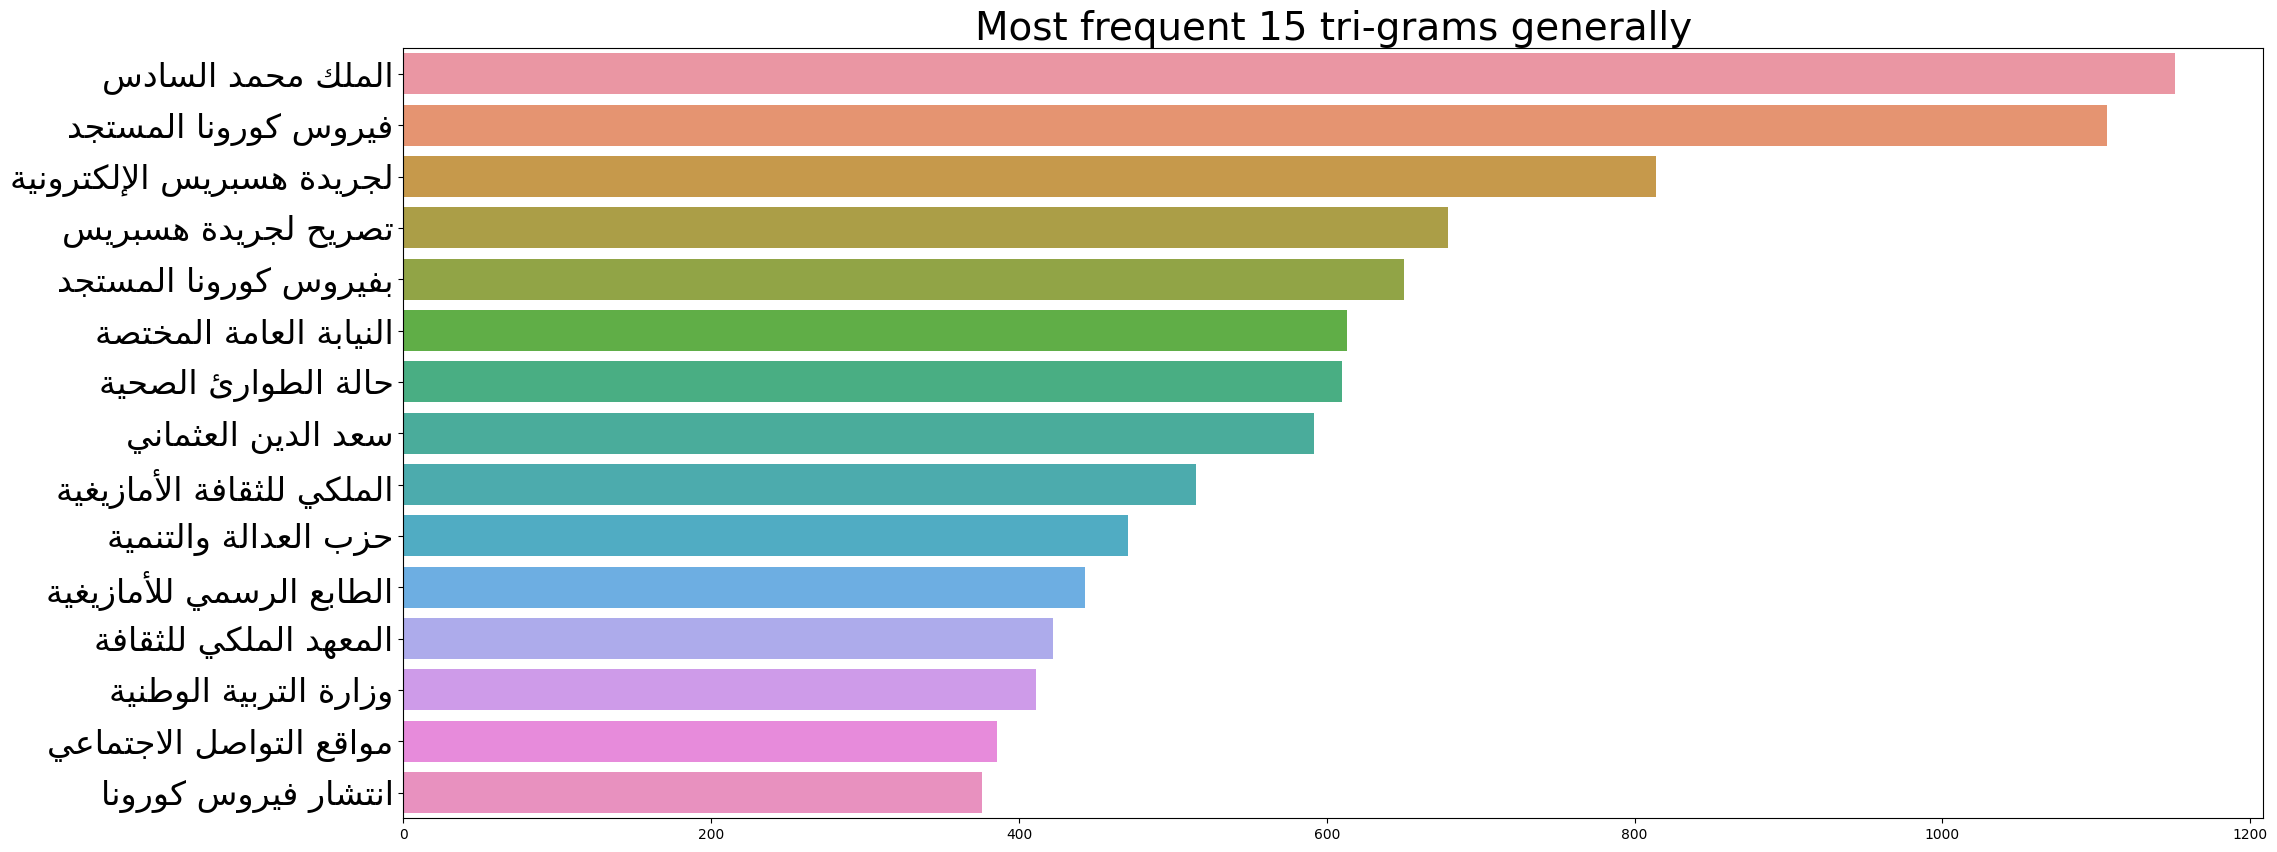

In [34]:
top_tri_grams=get_top_ngram(DataFrame['story'],n=3)
x,y=map(list,zip(*top_tri_grams))
arabic_tri_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]
plt.figure(figsize=(24,10))
sns.barplot(x=y,y=arabic_tri_grams)
plt.title("Most frequent 15 tri-grams generally",fontsize=28)
plt.yticks(fontsize=24)


### top frequent n-grams per topic

c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(
c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد

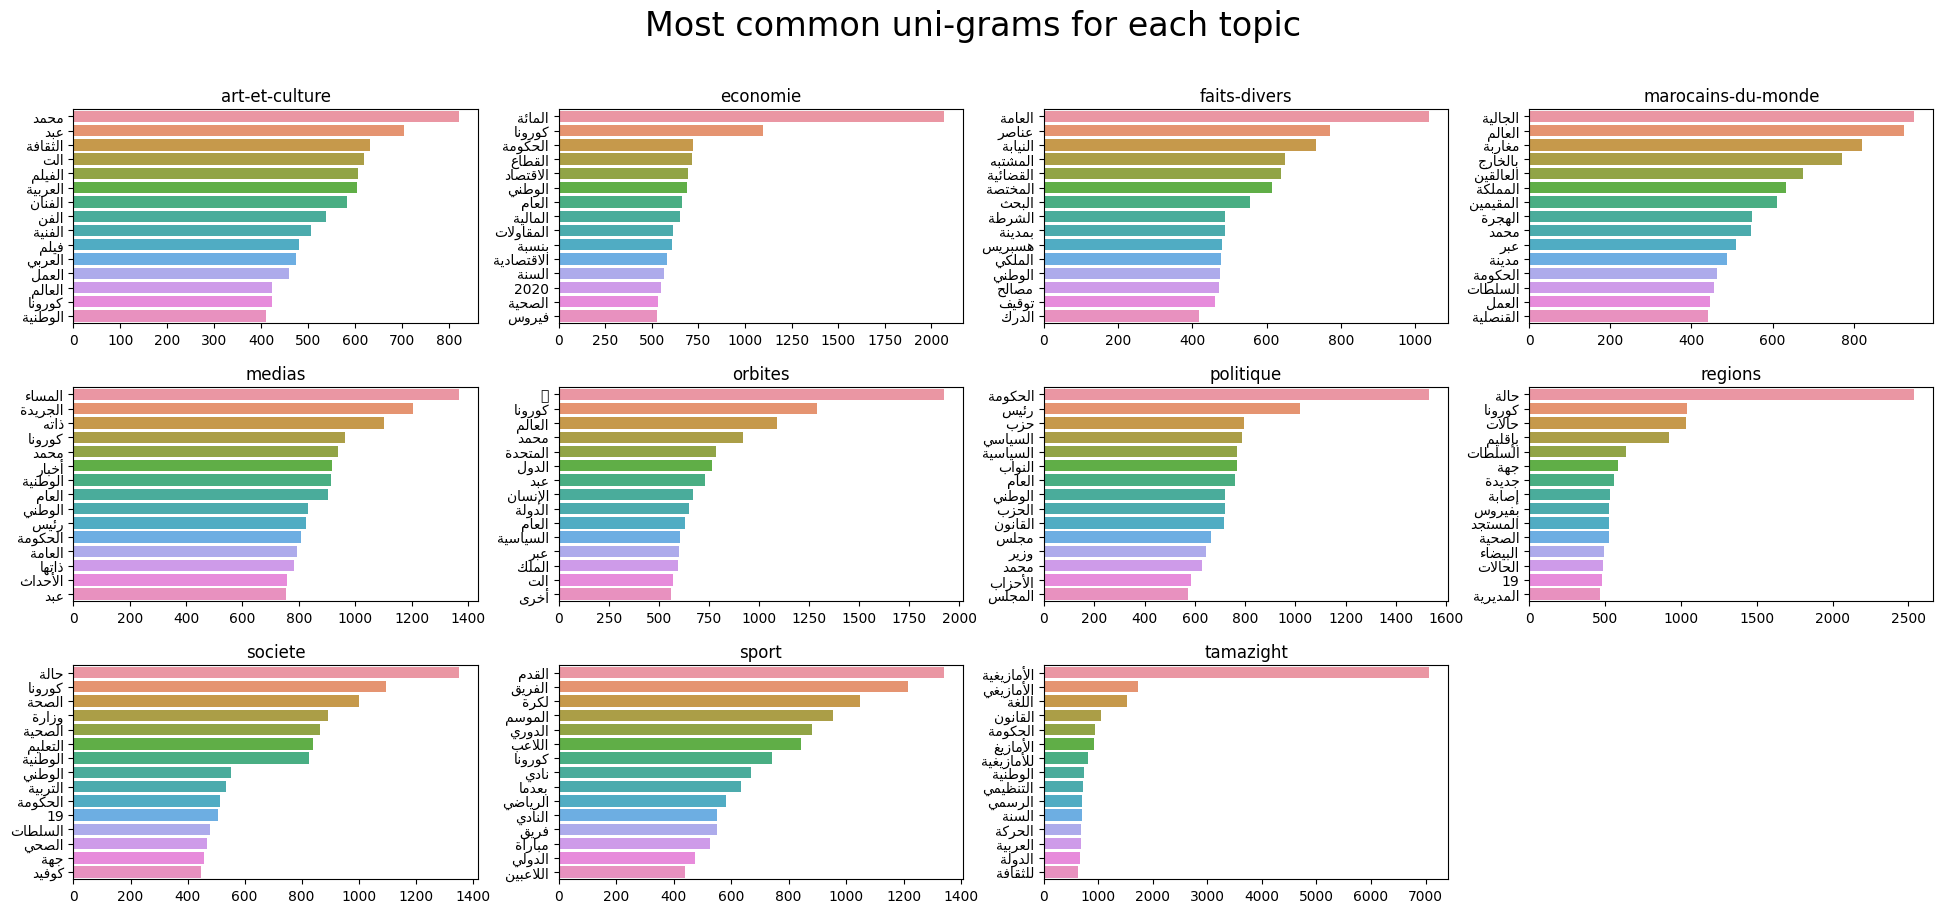

In [14]:
#unigrams
plt.figure(figsize=(24,10))
plt.subplots_adjust(hspace=0.3)
plt.suptitle("Most common uni-grams for each topic", fontsize=24)
for index,topic in enumerate(topics):
    top_uni_grams=get_top_ngram(DataFrame.loc[DataFrame['topic']==topic]['story'],n=1)
    x,y=map(list,zip(*top_uni_grams))
    arabic_uni_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]

    ax = plt.subplot(3, 4, index + 1)                  
    sns.barplot(x=y,y=arabic_uni_grams)
    ax.set_title(str(topic))
    
plt.show()



c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(
c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد

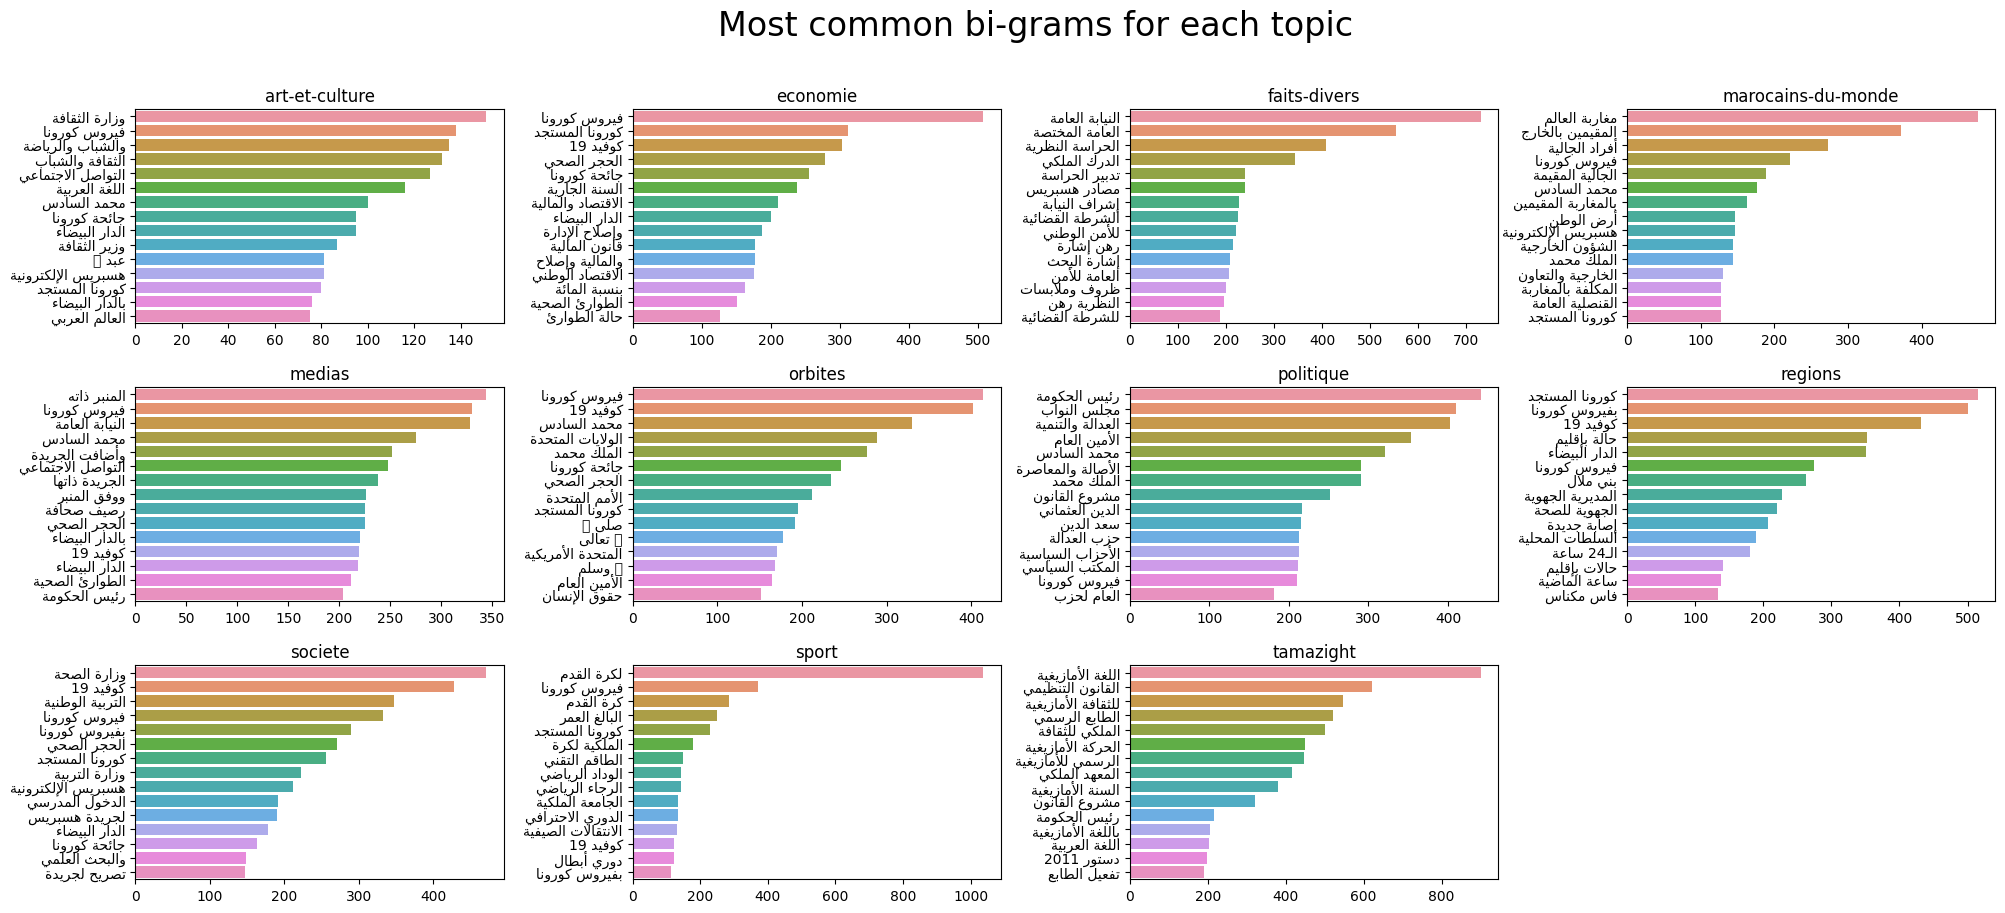

In [15]:
#bigrams
plt.figure(figsize=(24,10))
plt.subplots_adjust(hspace=0.3,wspace=0.35)
plt.suptitle("Most common bi-grams for each topic", fontsize=24)
for index,topic in enumerate(topics):
    top_bi_grams=get_top_ngram(DataFrame.loc[DataFrame['topic']==topic]['story'],n=2)
    x,y=map(list,zip(*top_bi_grams))
    arabic_bi_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]

    ax = plt.subplot(3, 4, index + 1)                  
    sns.barplot(x=y,y=arabic_bi_grams)
    ax.set_title(str(topic))
    
plt.show()

c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد', 'تحو', 'تعل', 'حد', 'حم', 'حي', 'خب', 'ذار', 'ذان', 'سيما', 'شتان', 'صه', 'ظن', 'عد', 'قط', 'كأي', 'مر', 'مكان', 'مكانكن', 'نب', 'هات', 'هاك', 'هب', 'واها', 'وراء'] not in stop_words.
  warnings.warn(
c:\Users\Abdelrahman Muhsen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_extraction\text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['آمين', 'آها', 'أب', 'أخ', 'أف', 'أفعل', 'أفعله', 'ؤلاء', 'إل', 'إليك', 'إليكن', 'إم', 'إيه', 'ات', 'اتان', 'ارتد', 'انفك', 'بخ', 'برح', 'بس', 'تان', 'تبد

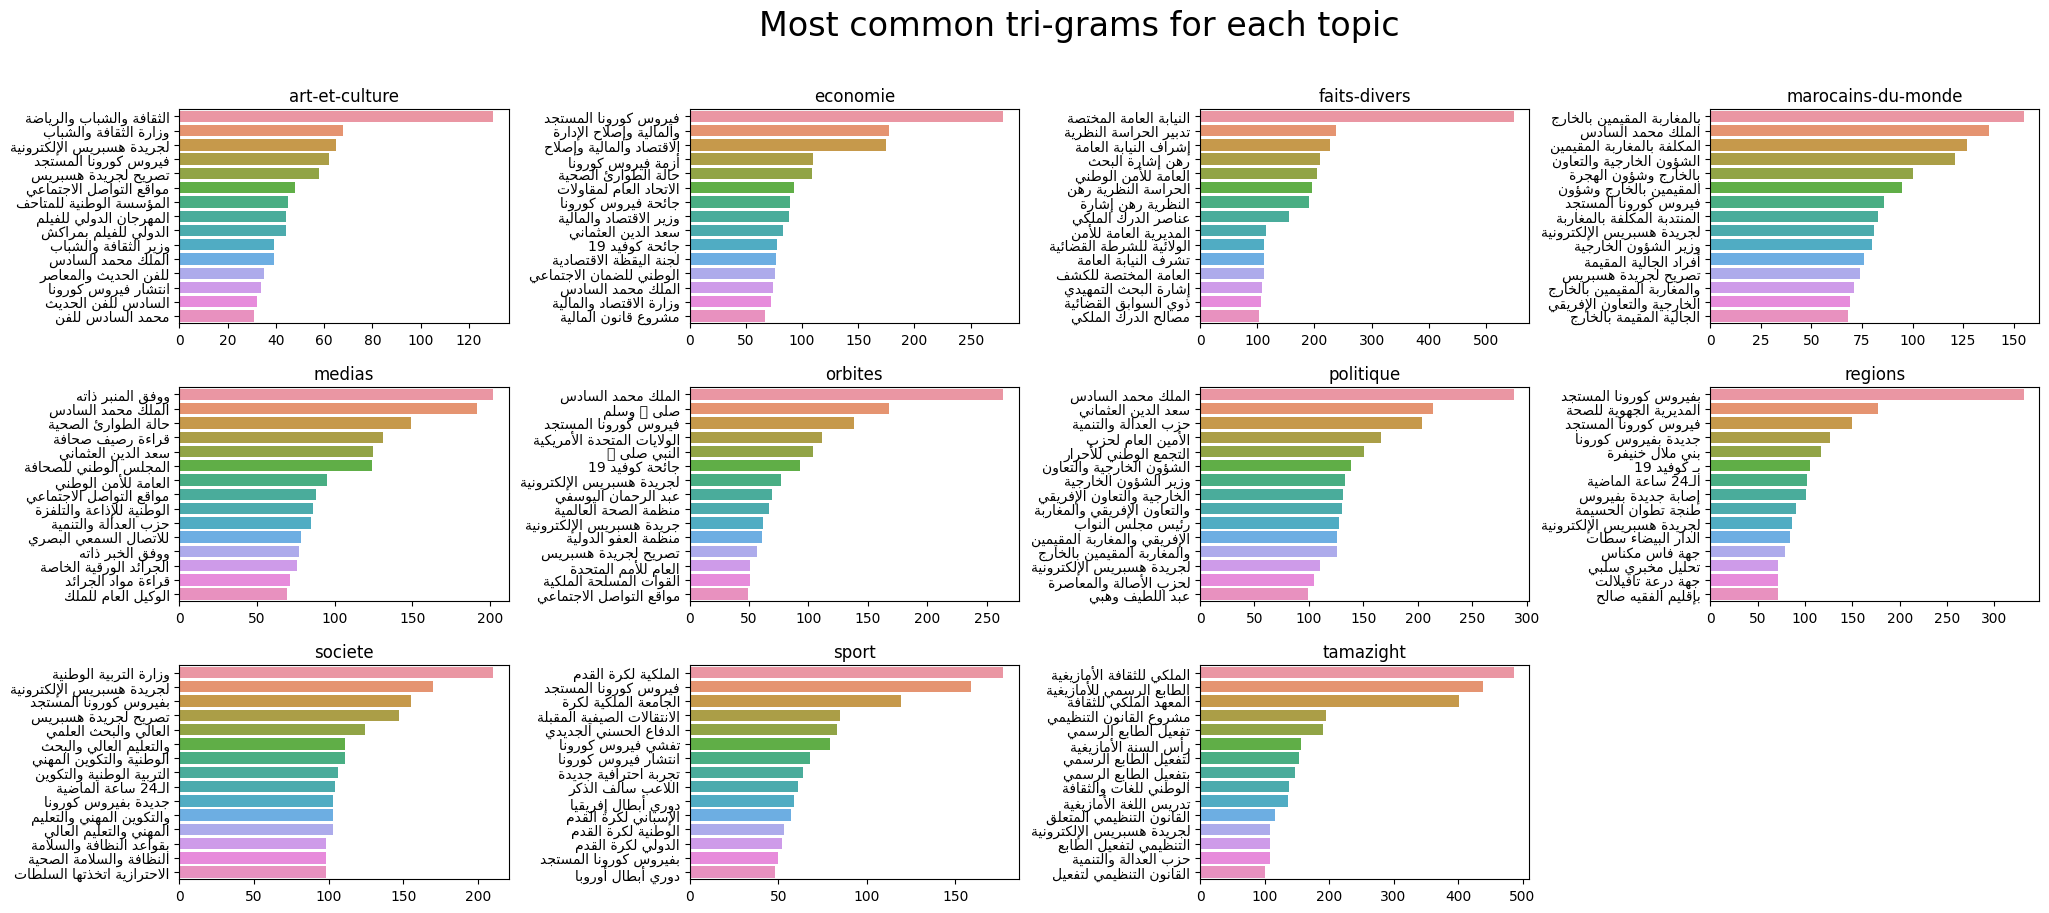

In [20]:
#trigrams
plt.figure(figsize=(24,10))
plt.subplots_adjust(hspace=0.3,wspace=0.55)
plt.suptitle("Most common tri-grams for each topic", fontsize=24)
for index,topic in enumerate(topics):
    top_tri_grams=get_top_ngram(DataFrame.loc[DataFrame['topic']==topic]['story'],n=3)
    x,y=map(list,zip(*top_tri_grams))
    arabic_tri_grams=[get_display(arabic_reshaper.reshape(k)) for k in x]

    ax = plt.subplot(3, 4, index + 1)                  
    sns.barplot(x=y,y=arabic_tri_grams)
    ax.set_title(str(topic))
    
plt.show()

##  lengths of examples in words and letters

Text(0.5, 1.0, 'lengths of examples in words')

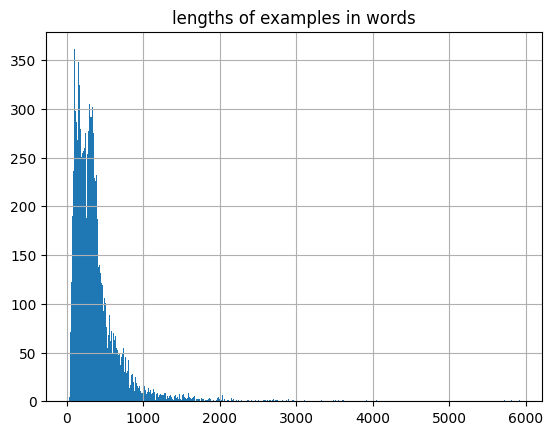

In [22]:
#len of story in words
DataFrame['story'].str.split().map(lambda x: len(x)).hist(bins=500).set_title('lengths of examples in words')

Text(0.5, 1.0, 'lengths of examples in letters')

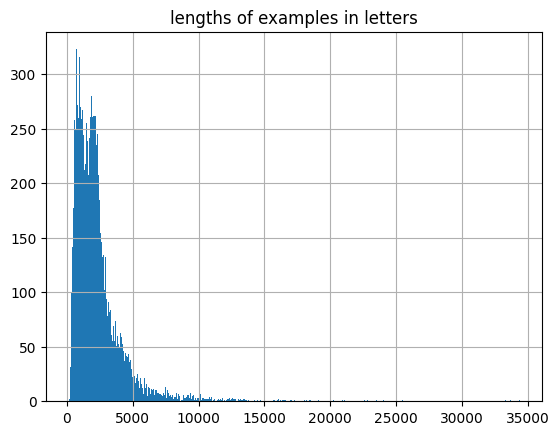

In [23]:
# len of story in letters
DataFrame['story'].str.len().hist(bins=500).set_title('lengths of examples in letters')

Text(0.5, 1.0, 'AVG word length in examples')

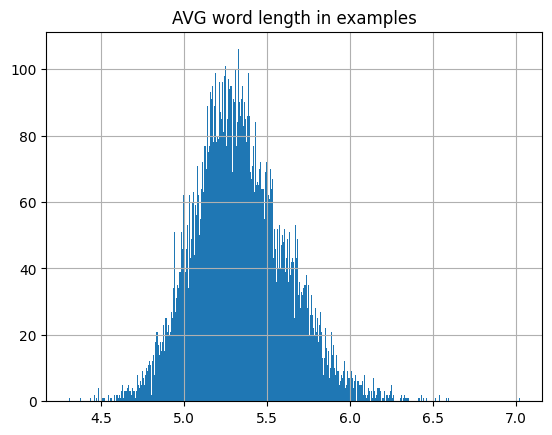

In [24]:
# avg word len in a story
DataFrame['story'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=500).set_title('AVG word length in examples')